In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\\Users\\HP\Downloads\userbehaviour.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [3]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


PROBLEMS:
    
    Find relationships between the users who are still using the application and the users who have uninstalled the application and create user segments to understand the retained users and the users that can be retained before they move to other alternatives.

In [7]:
print('\n Numbers Of Custumer who till Have Our Application and who have Uninstalled it')
df['Status'].value_counts()


 Numbers Of Custumer who till Have Our Application and who have Uninstalled it


Installed      916
Uninstalled     83
Name: Status, dtype: int64

In [18]:
round(df[df['Status']=='Uninstalled'].shape[0]/df.shape[0]*100,2)

8.31

That is About 8% Of Custumer have Uninstalled the Application

In [19]:
df['Last_visited_min']=df['Last Visited Minutes']/60

In [20]:
df_active=df.query('Status=="Installed"')


df_active

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Last_visited_min
0,1001,17.0,634.0,1,9,7,2990,Installed,49.833333
2,1003,37.0,207.0,0,8,5,971,Installed,16.183333
3,1004,32.0,445.0,1,6,2,799,Installed,13.316667
4,1005,45.0,427.0,1,5,6,3668,Installed,61.133333
5,1006,28.0,599.0,0,9,4,2878,Installed,47.966667
...,...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed,31.083333
995,1996,43.0,61.0,0,6,8,1327,Installed,22.116667
996,1997,47.0,761.0,0,6,1,1936,Installed,32.266667
997,1998,6.0,73.0,1,5,1,3436,Installed,57.266667


In [21]:
df_inact=df.query('Status=="Uninstalled"')

df_inact

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Last_visited_min
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,400.133333
38,1039,1.0,97.0,0,1,7,37959,Uninstalled,632.650000
43,1044,4.0,93.0,0,2,8,49334,Uninstalled,822.233333
46,1047,3.0,34.0,1,5,6,39016,Uninstalled,650.266667
61,1062,5.0,67.0,0,2,6,30435,Uninstalled,507.250000
...,...,...,...,...,...,...,...,...,...
947,1948,2.0,3.0,1,3,14,16067,Uninstalled,267.783333
949,1950,0.0,95.0,0,1,10,16324,Uninstalled,272.066667
956,1957,2.0,31.0,0,5,7,15904,Uninstalled,265.066667
978,1979,1.0,73.0,0,3,13,45734,Uninstalled,762.233333


Text(0.5, 1.0, 'Inactive user (Min Spent)')

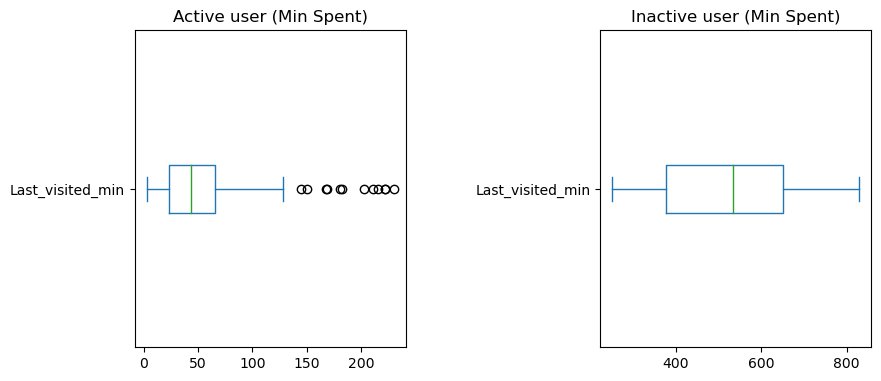

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
df_active['Last_visited_min'].plot.box(vert=False)
plt.title('Active user (Min Spent)')

plt.subplot(1,2,2)
df_inact['Last_visited_min'].plot.box(vert=False)
plt.tight_layout(pad=5)
plt.title('Inactive user (Min Spent)')

In [23]:
df_active.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Last_visited_min
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1501.757642,26.394105,458.158297,0.500000,6.873362,4.514192,2741.105895,45.685098
std,287.926228,13.129732,304.329671,0.500273,2.479051,2.297734,1767.990232,29.466504
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,3.350000
25%,1253.750000,16.000000,168.750000,0.000000,5.000000,3.000000,1400.500000,23.341667
50%,1504.500000,26.000000,458.000000,0.500000,7.000000,5.000000,2605.500000,43.425000
75%,1749.250000,37.000000,738.250000,1.000000,9.000000,6.000000,3943.250000,65.720833
max,1999.000000,50.000000,998.000000,1.000000,10.000000,8.000000,13777.000000,229.616667


In [24]:
df_inact.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Last_visited_min
count,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,1480.60241,2.277108,52.024096,0.469880,2.542169,9.662651,31264.277108,521.071285
std,296.20683,1.713029,31.244502,0.502126,1.684225,3.295515,10417.640611,173.627344
min,1002.00000,0.000000,0.000000,0.000000,0.000000,5.000000,15053.000000,250.883333
25%,1210.00000,1.000000,26.000000,0.000000,1.000000,7.000000,22531.500000,375.525000
50%,1476.00000,2.000000,47.000000,0.000000,2.000000,9.000000,31950.000000,532.500000
75%,1746.00000,4.000000,83.500000,1.000000,4.000000,12.500000,39084.500000,651.408333
max,1980.00000,5.000000,100.000000,1.000000,5.000000,15.000000,49715.000000,828.583333


One Beautiful Justification for User Uninstalling the Application is :
    
    1.Password requirement reoccur every now and then.

In [25]:
#it well expected That The inactive(Uninstalled) rate The Applicaction Zero ?, 
#why on earthh will The Active user also rate The applixation ZERO(0)

inst_rat=df_active.query('Ratings==0')
inst_rat.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Last_visited_min
count,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000
mean,1554.458333,6.500000,57.875000,0.500000,0.0,3.625000,4108.500000,68.475000
std,298.914701,2.843757,27.495948,0.510754,0.0,2.318405,2686.962063,44.782701
min,1029.000000,0.000000,4.000000,0.000000,0.0,1.000000,453.000000,7.550000
25%,1293.000000,4.000000,38.750000,0.000000,0.0,2.000000,2330.750000,38.845833
50%,1692.000000,7.000000,59.500000,0.500000,0.0,2.500000,4039.500000,67.325000
75%,1786.000000,9.000000,80.500000,1.000000,0.0,6.000000,4609.750000,76.829167
max,1955.000000,10.000000,96.000000,1.000000,0.0,8.000000,10114.000000,168.566667


#Oh Damn, Look At That ?? we gat 24 in numbers who rate the APp ZERO(0)
it Look Like, we will till be having more custumer leaving The App so soon, because of The Password reoccurence.
and Their Max Average Screen Time is so Loww..

In [26]:
df_active['Left Review'].value_counts()

1    458
0    458
Name: Left Review, dtype: int64

In [27]:
df_inact['Left Review'].value_counts()

0    44
1    39
Name: Left Review, dtype: int64

In [28]:
inst_rat['Left Review'].value_counts()

0    12
1    12
Name: Left Review, dtype: int64

In [29]:
df

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Last_visited_min
0,1001,17.0,634.0,1,9,7,2990,Installed,49.833333
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,400.133333
2,1003,37.0,207.0,0,8,5,971,Installed,16.183333
3,1004,32.0,445.0,1,6,2,799,Installed,13.316667
4,1005,45.0,427.0,1,5,6,3668,Installed,61.133333
...,...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed,31.083333
995,1996,43.0,61.0,0,6,8,1327,Installed,22.116667
996,1997,47.0,761.0,0,6,1,1936,Installed,32.266667
997,1998,6.0,73.0,1,5,1,3436,Installed,57.266667


In [30]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Last_visited_min
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899,85.181648
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516,143.200609
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,3.350000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000,24.925000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000,47.750000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000,69.966667
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000,828.583333


In [31]:
df[['New Password Request','Average Screen Time']].unique

array([17.,  0., 37., 32., 45., 28., 49.,  8., 44., 24.,  1., 41., 11.,
       38., 34., 21., 18., 15., 26., 48., 33.,  9., 47., 30., 35., 12.,
       22.,  3., 40.,  4., 43., 50., 19., 25., 42.,  5., 20., 39., 46.,
        6., 23., 10., 14., 31., 16., 27., 29.,  7.,  2., 13., 36.])

In [71]:
def label (X):
    if X> 0 and X<= 5:
        return "Retain"
    elif X> 5 and X <=8:
        return "Semi_churn"
    elif X> 8 and X<=15:
        return "churn"
    else:
        return "Churn_away"

In [74]:
 df['Class']=df['New Password Request'].apply(label)

In [75]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Last_visited_min,Class
0,1001,17.0,634.0,1,9,7,2990,Installed,49.833333,Semi_churn
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,400.133333,Semi_churn
2,1003,37.0,207.0,0,8,5,971,Installed,16.183333,Retain
3,1004,32.0,445.0,1,6,2,799,Installed,13.316667,Retain
4,1005,45.0,427.0,1,5,6,3668,Installed,61.133333,Semi_churn


In [76]:
df['Class'].value_counts()

Retain        570
Semi_churn    381
churn          48
Name: Class, dtype: int64